Author: Thibeau Wouters

##### Imports:

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import statistics 
from scipy import stats
import time

##### Configure matplotlib settings

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     "font.serif": "Modern Roman",
     "figure.figsize": (10, 8),
     "axes.titlesize" : 26,
     "axes.labelsize" : 28,
     "lines.linewidth": 3,
     "lines.markersize" : 10,
     "legend.fontsize":20,
     "xtick.labelsize" : 24,
     "ytick.labelsize" : 24})

##### Functions:

In [3]:
def g(x, y, z):
    '''The function g is defined in the report.'''
    return (x + y + z)**2

In [4]:
def approximate_integral(npts, nrep):
    '''Approximates the integral from Problem 3 using the Monte Carlo method from the course notes.'''
    I = []
    for k in range(nrep):
        s = 0
        for i in range(npts):
            x = random.gauss(0,1); y = random.gauss(0,1); z = random.gauss(0,1);
            s += g(x, y, z)
        I.append(s*(2*np.pi)**1.5/npts)
    return I

In [5]:
def compute_new_average(averages, value):
    '''Given a list of averages and a new value which gets added to the list, compute the average 
        of the new list efficiently. See the report for details.'''
    
    # Obtain length of old list
    N = len(averages)
    
    # Base case: this is the first value, the old list was empty
    if N == 0:
        return value
    
    # If old list was not empty, compute new average
    else:
        return (N/(N+1))*averages[-1] + value/(N+1)

In [6]:
def steps_integral(npts, prev_averages = []):
    '''Saves all the intermediate steps when calculating the approximation for the integral. (See exercise 4.4)
        Optional argument prev_averages: if wanted, we can continue an approximation.'''
    
    # Start from previous collection of averages OR start new approximation (= default)
    if prev_averages == []:
        averages = []
    else:
        averages = prev_averages
    
    # Start approximating, return the approximation each time
    for i in range(npts):
            
            # Take random numbers and do a evaluation of g
            x = random.gauss(0,1); y = random.gauss(0,1); z = random.gauss(0,1);
            value = g(x, y, z)
            
            # Compute the average (to approximate the integral) and store
            new_average = compute_new_average(averages, value)
            averages.append(new_average)
            
    return averages

Store the exact value of the integral.

In [7]:
exact = 3*(2*np.pi)**1.5

# 3 - Monte Carlo Integration (I)

## 3.1 - Analytical calculation

This is done in full detail in the report.

## 3.2 - Numerical approximation of the integral

Approximate the integral: we can play around with npts and nrep.

In [8]:
# Number of points per run: npts, Number of replicas: nrep
npts = 10**4; nrep=100;
I = approximate_integral(npts, nrep)

In [9]:
print("Approximation of the integral is %0.4f, the exact value is %0.4f, the sample standard deviation was %0.4f" %(np.mean(I), exact, np.std(I)))

Approximation of the integral is 47.2923, the exact value is 47.2488, the sample standard deviation was 0.7193


Make a plot of the average value at each step of nrep, along with the exact value, to see the fluctuations.

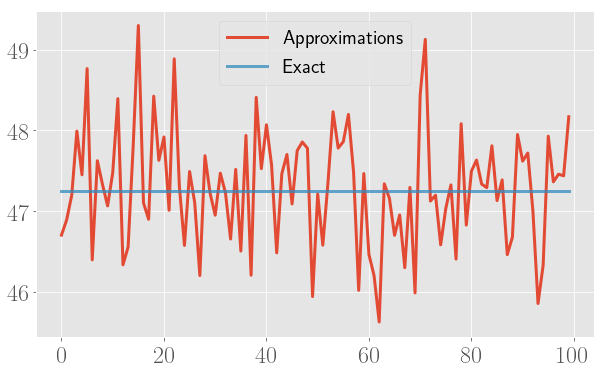

In [10]:
plt.subplots(figsize =  (10,6))
plt.plot(I, label = "Approximations") 
plt.plot([exact for i in I], alpha = 0.75, label = "Exact")
plt.legend()
## Uncomment the next line to save the plot
#plt.savefig("ex3_approximation_integral.pdf", bbox_inches = 'tight')
plt.show()

## 3.3 - Variances

We look at the behaviour of the variances in function of the number of points we sample (in the report called $N$, here called npts).

In [11]:
npts_list = np.arange(50, 6050, 50)

The following command block takes a bit of time.

In [12]:
# Initialise
nrep = 100
var = []
inverse_var = []

# Approximate the integral for each value of npts, save variance AND reciprocal of variance
start = time.time()
for npts in npts_list:
    I = approximate_integral(npts, nrep)
    value = np.var(I)/np.mean(I)
    
    var.append(value)
    inverse_var.append(1/value)
    
end = time.time()
print("Elapsed time was ", end - start, " seconds.")

Elapsed time was  87.8952898979187  seconds.


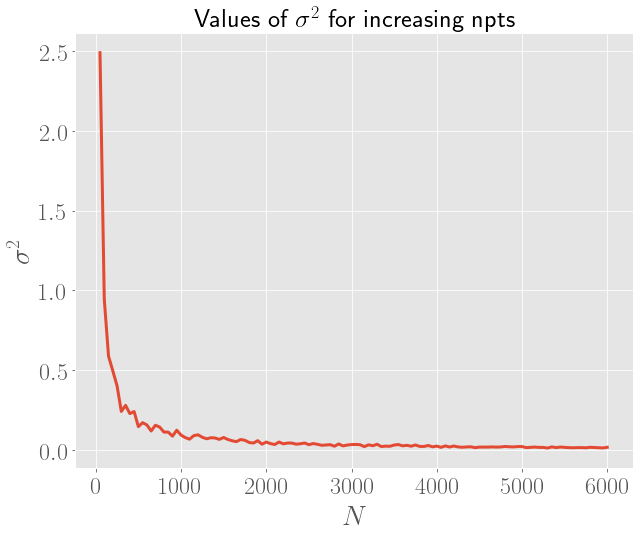

In [13]:
# Plot the variances
plt.plot(npts_list, var, label = r"$\sigma^2$")

# Make fancy, save and show
plt.title(r'Values of $\sigma^2$ for increasing npts')
plt.xlabel(r'$N$')
plt.ylabel(r'$\sigma^2$')
## Uncomment the next line to save the plot
#plt.savefig('ex3_variances.pdf', bbox_inches = 'tight')
plt.show()

We can make a simple linear regression fit through the points $(N, 1/\sigma^2)$ to check the relation.

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(npts_list, inverse_var)
print('The coefficient of determination for the fit is equal to %0.4f. The slope is %0.4f and the intercept is %0.4f' %(r_value**2, slope, intercept))

The coefficient of determination for the fit is equal to 0.9315. The slope is 0.0114 and the intercept is -0.8854


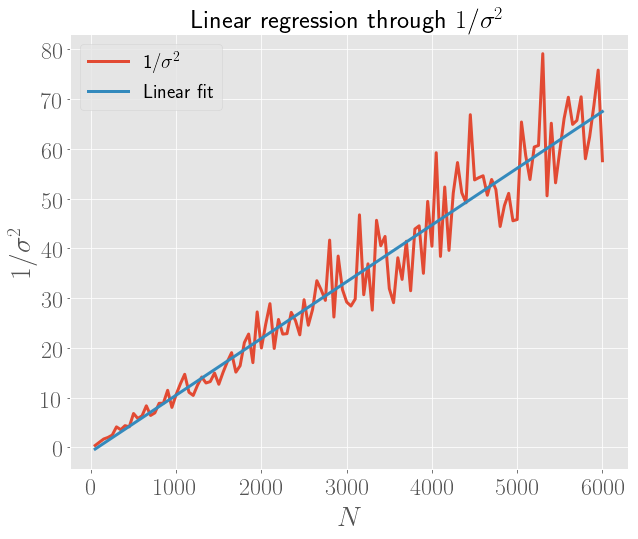

In [15]:
plt.plot(npts_list, inverse_var, label = r"1/$\sigma^2$")
t = np.arange (npts_list[0], npts_list[-1], 1)
y = slope*t + intercept
plt.plot(t, y, label = "Linear fit")
plt.xlabel(r'$N$')
plt.ylabel(r'$1/\sigma^2$')
plt.title(r'Linear regression through $1/\sigma^2$')
plt.legend()
plt.savefig("ex3_regression.pdf", bbox_inches = 'tight')
plt.show()

## For exercise 4.4 - Comparison between Gaussian RNG and Metropolis

In Problem 4, exercise 4, we are asked to compare the Gaussian RNG with the Metropolis algorithm. For this, I defined the function steps_integral, and will plot something below for my discussion. See the report, Section 4 for more details.

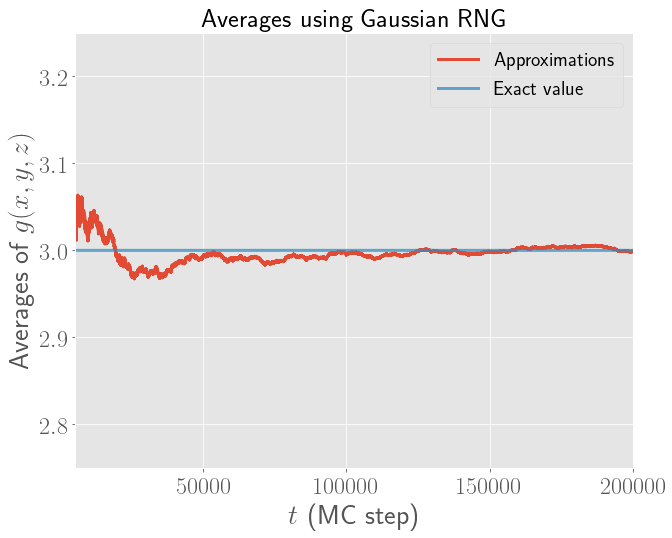

In [16]:
# Make approximation of value 3 after npts iterations
npts = 2*10**5
avgs = steps_integral(npts) 

# Make a plot of the approximations at each step & exact value
plt.plot(avgs, label = 'Approximations')
plt.plot([3 for i in range(len(avgs))], alpha = 0.75, label = 'Exact value')


# Make fancy, save and show
plt.ylim(2.75, 3.25)
plt.xlim(5000, len(avgs))
plt.xlabel(r'$t$ (MC step)')
plt.ylabel(r'Averages of $g(x,y,z)$')
plt.title('Averages using Gaussian RNG')
plt.legend()
## Uncomment the next line to save the plot
#plt.savefig('ex4_comparison_Gaussian.pdf', bbox_inches = 'tight')
plt.show()

The output of the above algorithm is always relatively consistent. This will be compared with the Metropolis algorithm of exercise 4.